# Part I - Ford GoBike System Data Exploration
## by Bashir Ibraheem Olamide

## Introduction

>The dataset comprises Ford GoBike trip data for February 2019, providing information on individual bike trips within the system. It includes trip duration, start and end times, station details, bike IDs, user types, birth years, and genders. This dataset serves as the foundation for analyzing bike usage patterns, user behaviors, trip durations, spatial distributions, and temporal trends. Before commencing the analysis, a crucial step involves data cleaning and preprocessing.

## Preliminary Wrangling

In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [119]:
# Loading the dataset
dataset = pd.read_csv('201902-fordgobike-tripdata.csv')

In [120]:
# Displaying the first 5 rows of the dataset
dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [121]:
# Checking the shape of the dataset
missing_values = dataset.isnull().sum()
missing_values

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [124]:
# Checking the shape of the dataset
dataset.shape

(183215, 16)

In [125]:
# Checking the datatypes of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  int64  
 12  user_type                183215 non-null  object 
 13  member_birth_year        183215 non-null  float64
 14  memb

## Data Cleaning

### Handling Missing Values

**Issue #1**: Missing values in start_station_id, start_station_name, end_station_id , end_station_name, member_birth_year, member_gender columns

**Define**: Drop the rows with missing values for start_statio_id, start_station_name, end_station_id and end_station_name
For 'member_birth_year':
- I chose to fill missing values with the median birth year. Filling with the median is a reasonable choice as it is less sensitive to outliers compared to the mean.

For 'member_gender':
- I chose to fill missing values with 'Unknown.'

In [133]:
# Remove rows with missing values in the specified columns
columns_to_check = ["start_station_id", "start_station_name", "end_station_id", "end_station_name"]
dataset.dropna(subset=columns_to_check, inplace=True)

In [134]:
# Replace missing values in member_birth_year with the median and member gender with Unknown
dataset['member_birth_year'].fillna(dataset['member_birth_year'].median(), inplace=True)
dataset['member_gender'].fillna('Unknown', inplace=True)

In [135]:
# Testing
dataset.isnull().any().sum()

0

**Issue #2**: start_time and end_time columns are in string (object)

**Define**: Convert the columns to datetime

In [136]:
# Converting the datatype of the columns: start_time and end_time to datetime
dataset['start_time'] = pd.to_datetime(dataset['start_time'])
dataset['end_time'] = pd.to_datetime(dataset['end_time'])

In [137]:
# Testing
dataset['end_time'][0]

Timestamp('2019-03-01 08:01:55.975000')

In [138]:
dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day_of_week,start_hour_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,montgomery st bart station (market st at 2nd st),37.789625,-122.400811,13.0,commercial st at montgomery st,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,the embarcadero at steuart st,37.791464,-122.391034,81.0,berry st at 4th st,37.775880,-122.393170,2535,Customer,1987.0,Unknown,No,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,market st at dolores st,37.769305,-122.426826,3.0,powell st bart station (market st at 4th st),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,grove st at masonic ave,37.774836,-122.446546,70.0,central ave at fell st,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,frank h ogawa plaza,37.804562,-122.271738,222.0,10th ave at e 15th st,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23


**Issue #3**: user_type in string (object)

**Define**: Convert the column to category

In [139]:
# Converting user_type to category
dataset['user_type'] = dataset['user_type'].astype('category')

Issue #4: bike_id in int64

Define: Convert the column to string(object)

In [141]:
# Converting bike_id to string
dataset['bike_id'] =dataset.bike_id.astype(str)

In [142]:
# Testing
type(dataset['bike_id'][0])

str

**Issue #5**: station_names are not consistent

**Define**: Convert all station names to lower case

In [144]:
# Standardizing the station names
dataset['start_station_name'] = dataset['start_station_name'].str.strip().str.lower()
dataset['end_station_name'] = dataset['end_station_name'].str.strip().str.lower()

In [146]:
dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day_of_week,start_hour_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,montgomery st bart station (market st at 2nd st),37.789625,-122.400811,13.0,commercial st at montgomery st,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,the embarcadero at steuart st,37.791464,-122.391034,81.0,berry st at 4th st,37.775880,-122.393170,2535,Customer,1987.0,Unknown,No,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,market st at dolores st,37.769305,-122.426826,3.0,powell st bart station (market st at 4th st),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,grove st at masonic ave,37.774836,-122.446546,70.0,central ave at fell st,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,frank h ogawa plaza,37.804562,-122.271738,222.0,10th ave at e 15th st,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23


In [147]:
# Checking duplicate rows
dataset.duplicated().sum()

0

In [151]:
# Extracting the hour, day and month colunns fron the start and end date columns
dataset['start_hour'] = dataset['start_time'].dt.hour
dataset['start_day'] = dataset['start_time'].dt.day_name()
dataset['start_month'] = dataset['start_time'].dt.month_name()
dataset['start_hour'] = dataset.start_hour.astype(str)


dataset['end_hour'] = dataset['end_time'].dt.hour
dataset['end_day'] = dataset['end_time'].dt.day_name()
dataset['end_month'] = dataset['end_time'].dt.month_name()
dataset['end_hour'] = dataset.end_hour.astype(str)

dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,end_hour,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,montgomery st bart station (market st at 2nd st),37.789625,-122.400811,13.0,commercial st at montgomery st,37.794231,...,Customer,1984.0,Male,No,17,Thursday,February,8,Friday,March
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,the embarcadero at steuart st,37.791464,-122.391034,81.0,berry st at 4th st,37.775880,...,Customer,1987.0,Unknown,No,18,Thursday,February,6,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,market st at dolores st,37.769305,-122.426826,3.0,powell st bart station (market st at 4th st),37.786375,...,Customer,1972.0,Male,No,12,Thursday,February,5,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,grove st at masonic ave,37.774836,-122.446546,70.0,central ave at fell st,37.773311,...,Subscriber,1989.0,Other,No,17,Thursday,February,4,Friday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,frank h ogawa plaza,37.804562,-122.271738,222.0,10th ave at e 15th st,37.792714,...,Subscriber,1974.0,Male,Yes,23,Thursday,February,0,Friday,March


In [152]:
# Saving the cleaned dataset
dataset.to_csv('201902-fordgobike-tripdata-cleaned.csv', index=False)

## Data Exploration

In [7]:
# Loading the cleaned dataset
dataset = pd.read_csv('201902-fordgobike-tripdata-cleaned.csv')

In [154]:
# Checking the dataset features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  int64  
 12  user_type                183215 non-null  object 
 13  member_birth_year        183215 non-null  float64
 14  memb

In [155]:
dataset.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour,end_hour
count,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000
mean,725.902017,138.590427,37.771615,-122.353104,136.249123,37.771820,-122.352689,4473.218792,1984.902213,13.458216,13.614497
std,1795.078654,111.778864,0.098914,0.116387,111.515131,0.098819,0.115961,1665.249372,9.898425,4.725819,4.740480
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000
25%,325.000000,47.000000,37.770407,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1981.000000,9.000000,9.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,14.000000,14.000000
75%,796.000000,239.000000,37.797280,-122.287180,235.000000,37.797320,-122.288665,5503.000000,1992.000000,17.000000,18.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000


### What is the structure of your dataset?

> The Ford GoBike dataset for February 2019 is structured with 16 columns, each capturing specific trip details. These columns include trip duration in seconds, start and end times, station identifiers and names, geographical coordinates, bike IDs, user types (Whether Subscriber or Customer), member birth years, and genders. Each row represents an individual bike trip. This structured format will enable me to explore temporal and spatial patterns, user demographics, and other insights related to bike-sharing trends in the San Francisco Bay Area during that period. There were initially 183,412 rides in the dataset with 16 features which was later dropped to 183,215 rides and 21 features after feature engineering. There are 2 datetime, 7 float, 4 int and 11 categorical(string) variables with no particular order

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in finding out what time of the day, day of the week, month of the year were most trips taken and the duration of trip by users

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I anticipate that the "start_time" variable will be pivotal for my investigation, enabling me to extract day, week, and month details. My expectation is that bike trips are more frequent during morning hours on weekdays, especially during holiday months. To delve into trip duration, I will focus on key features, including "duration_sec," "user_age," "start_hour," "start_station_name," "end_station_name," "user_type", "member_gender," and "bike_share_for_all_trip." These features will provide insights into the factors influencing trip duration and temporal patterns.

## Univariate Exploration

> In this section, I'm going to investigate distributions of individual variables, take a deeper look to clean things up and prepare to look at relationships between variables.

### What is the average trip duration?

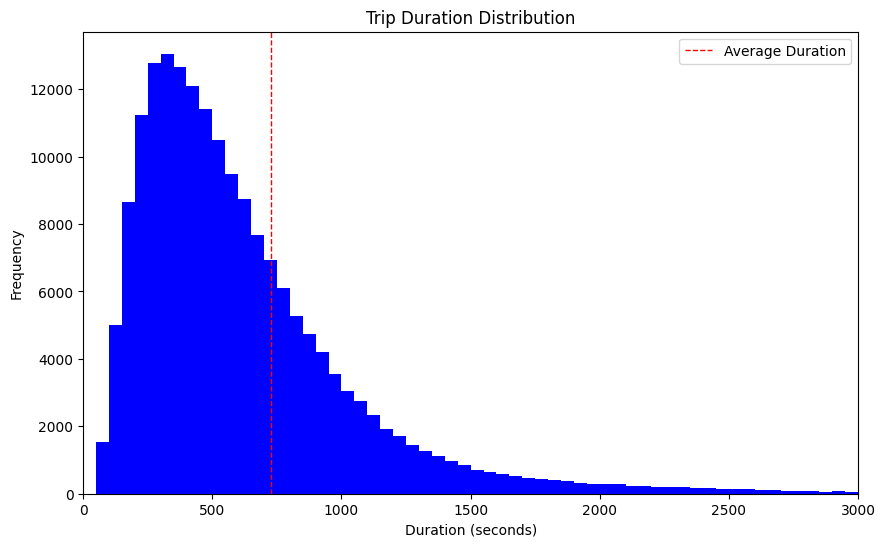

In [9]:
# Calculate the average trip duration
average_duration = dataset['duration_sec'].mean()

binsize = 50
bins = np.arange(50, dataset['duration_sec'].max()+binsize, binsize)

# Create a histogram to visualize the distribution of trip durations
plt.figure(figsize=(10, 6))
plt.hist(data=dataset, x='duration_sec', bins=bins, color='blue')
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim(0, 3000)
plt.xticks(range(0, 3001, 500)) 

# Show the average duration line
plt.axvline(x=average_duration, color='red', linestyle='dashed', linewidth=1, label='Average Duration')
plt.legend()
plt.show()

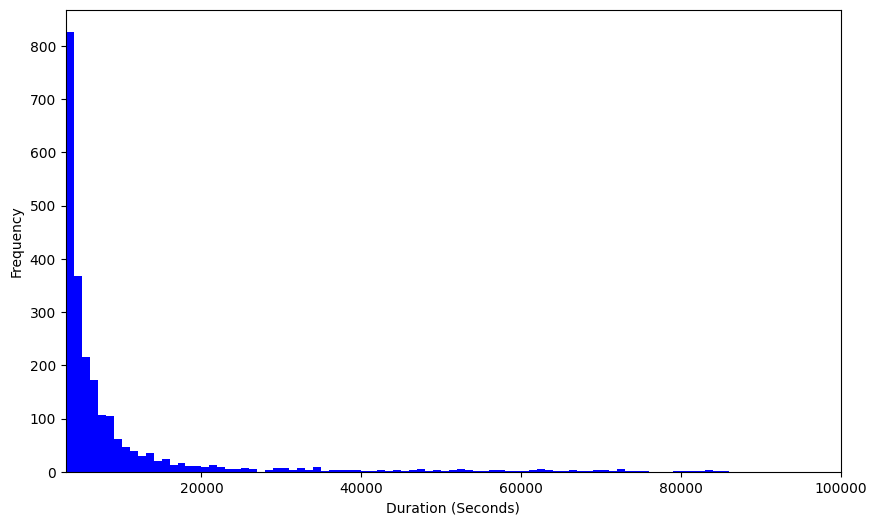

In [10]:
# the tail part of the distribution
binsize = 1000
bins = np.arange(3000, dataset['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = dataset, x = 'duration_sec', bins=bins, color='blue')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.xlim([3000, 100000])
plt.show()

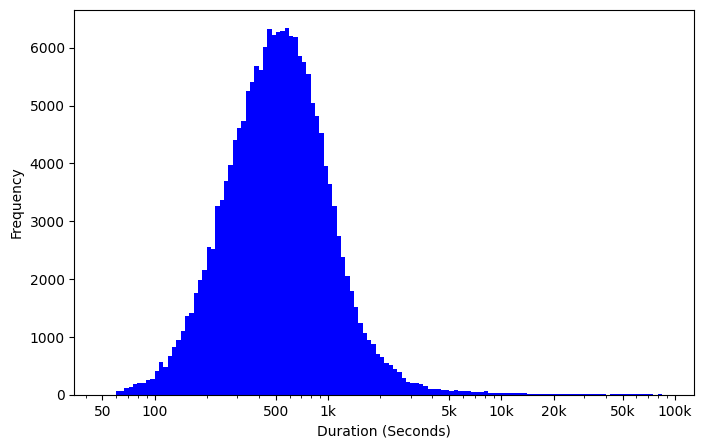

In [11]:
# the tail part of the distribution is right-skewed, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(dataset['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = dataset, x = 'duration_sec', bins=bins, color='blue')
plt.xscale('log')
# plt.xlim([0,3000])
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

> The distribution of trip durations is right-skewed, with a peak around 500 seconds (approximately 8 minutes), indicating that most bike trips are relatively short. Longer trips are less frequent, seen as a right-skewed tail in the distribution. When focusing on the tail part of the distribution, which includes trips longer than 50 minutes, the right-skewed pattern continues, and the frequency of longer trips decreases as the trip duration increases. Using a log scale on the x-axis for the entire range of trip durations reveals a long-tailed pattern, emphasizing that there are some outliers with very long durations, contributing to the right-skewed nature of the distribution.

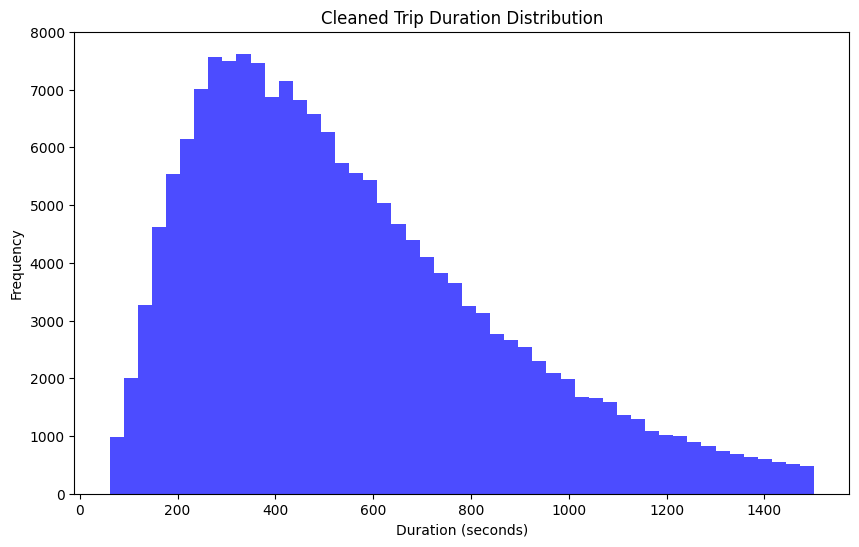

In [12]:
# Calculate Q1 and Q3
Q1 = dataset['duration_sec'].quantile(0.25)
Q3 = dataset['duration_sec'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
dataset_cleaned = dataset[(dataset['duration_sec'] >= lower_bound) & (dataset['duration_sec'] <= upper_bound)]

# Create a histogram to visualize the cleaned distribution
plt.figure(figsize=(10, 6))
plt.hist(dataset_cleaned['duration_sec'], bins=50, color='blue', alpha=0.7)
plt.title('Cleaned Trip Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

> I removed the outliers by performing outlier detection and removal using the Interquartile Range (IQR) method. I used this approach to eliminate data points in the duration_sec column that fall significantly below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, which I considered outliers so that they don't skew my results and mislead me to wrong conclusions.

### How many trips in a week?

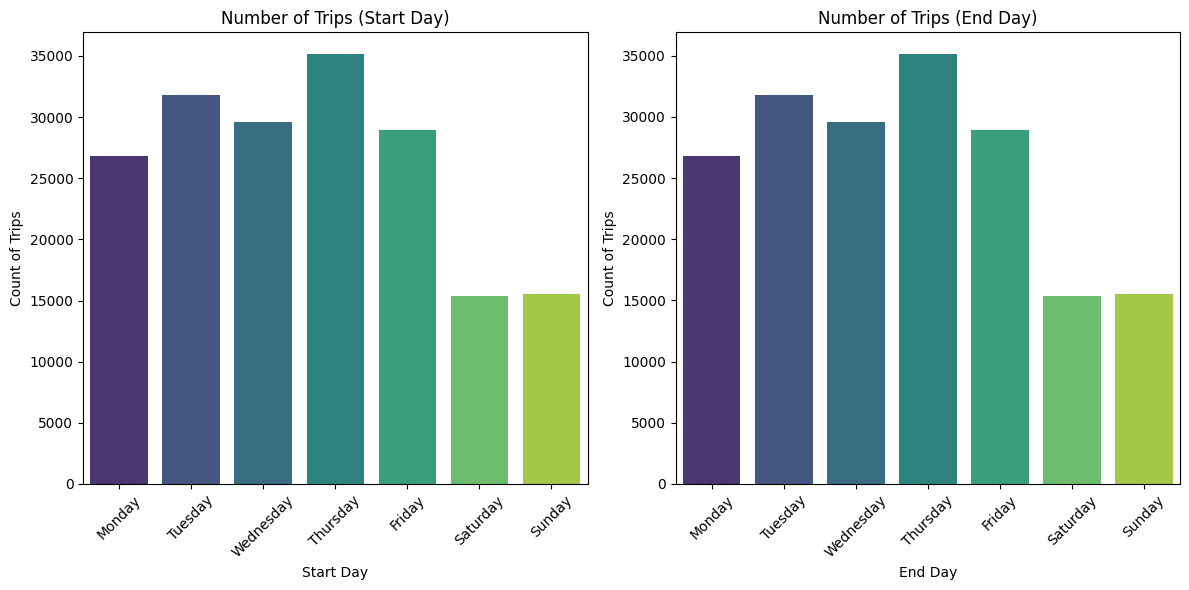

In [13]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create two count plots to visualize the number of trips for 'start_day' and 'end_day'
plt.figure(figsize=(12, 6))

# Count plot for 'start_day'
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='start_day', palette='viridis', order=day_order)
plt.title('Number of Trips (Start Day)')
plt.xlabel('Start Day')
plt.ylabel('Count of Trips')
plt.xticks(rotation=45)

# Count plot for 'end_day'
plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='end_day', palette='viridis', order=day_order)
plt.title('Number of Trips (End Day)')
plt.xlabel('End Day')
plt.ylabel('Count of Trips')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> Most trips were taken on Thursdays, followed by Tuesdays, Fridays, Wednesdays, and Mondays which have relatively consistent trends. In contrast, weekends, specifically Saturdays and Sundays, experienced a substantial drop in the number of trips, with Sunday having the lowest trip count among all days of the week. This distribution of trip records underscores a clear preference for weekday travel compared to weekends.

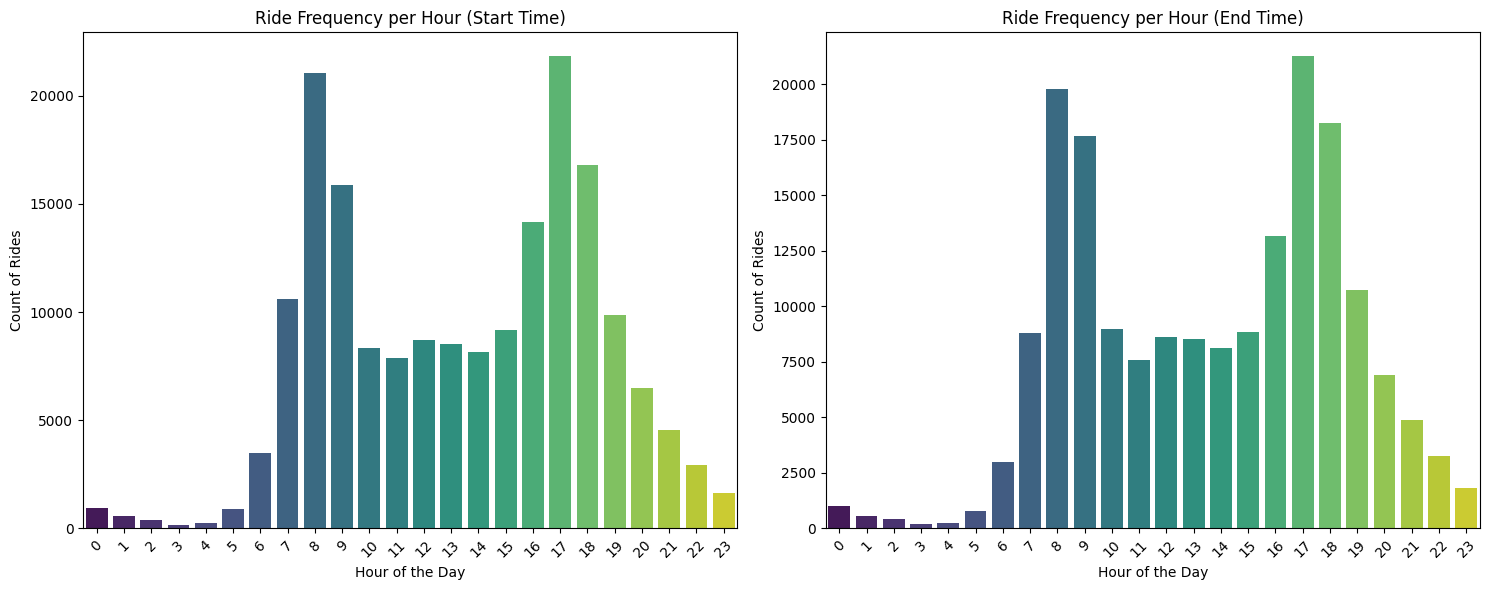

In [14]:
# Create subplots for start and end hours
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create count plots for ride frequency per hour (Start and End Times)
sns.countplot(data=dataset, x='start_hour', palette='viridis', ax=axes[0])
sns.countplot(data=dataset, x='end_hour', palette='viridis', ax=axes[1])

# Set titles and labels for the subplots
axes[0].set_title('Ride Frequency per Hour (Start Time)')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Count of Rides')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

axes[1].set_title('Ride Frequency per Hour (End Time)')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Count of Rides')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

> As observed the 8th, 9th, 17th, and 18th hours consistently exhibit the highest trip records, which aligns with my expectations as these hours are often associated with morning rush hours when people commute to work, and the closing hours when they return home. Conversely, the 3rd and 4th hours exhibit the lowest trip records. These early morning hours typically represent the least active period for bike-sharing services, as fewer individuals are likely to use bikes during these early hours of the day.

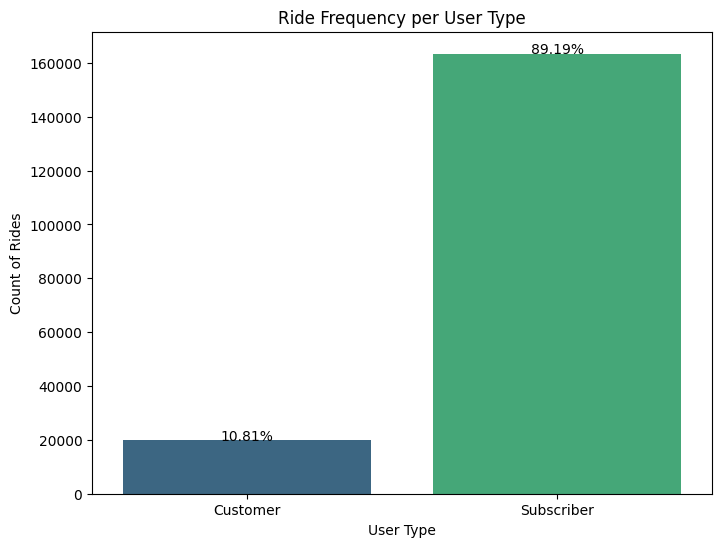

In [15]:
# Create a count plot to visualize ride frequency per user type
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dataset, x='user_type', palette='viridis')
plt.title('Ride Frequency per User Type')
plt.xlabel('User Type')
plt.ylabel('Count of Rides')

total = len(dataset)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

> From the above plot Subscribers tend to have a significantly higher ride frequency compared to Customers, accounting for over 89% of total rides indicating that the bike-sharing service is more frequently used by the Subscriber category, possibly due to regular commuting habits.

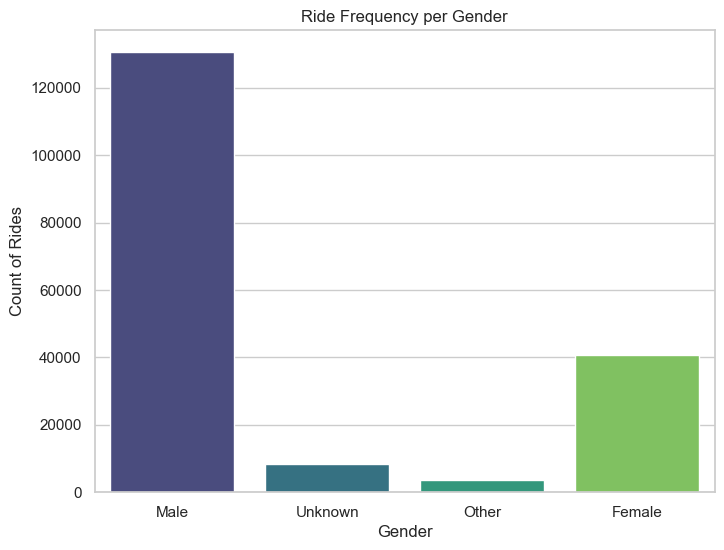

In [182]:
# Create a count plot to visualize ride frequency per gender
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='member_gender', palette='viridis')
plt.title('Ride Frequency per Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Rides')
plt.show()

> From the above plot, there is differences in bike-sharing usage patterns across gender identities. Males exhibit the highest ride frequency, followed by Females, while the "Other" gender category records the lowest ride frequency.

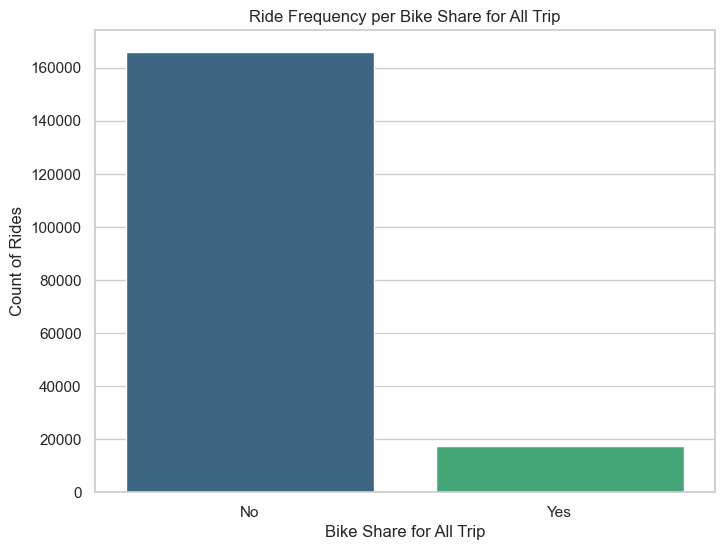

In [183]:
# Create a count plot to visualize ride frequency per bike_share_for_all_trip
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='bike_share_for_all_trip', palette='viridis')
plt.title('Ride Frequency per Bike Share for All Trip')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Count of Rides')
plt.show()

> The count plot for ride frequency based on "bike_share_for_all_trip" highlights that a significant majority of riders did not opt for the "Bike Share for All Trip" program, which resulted in a higher ride frequency in the "No" category. Conversely, the "Yes" category indicated a lower ride frequency, suggesting that fewer riders participate in the bike-sharing program that allows sharing for all trips.

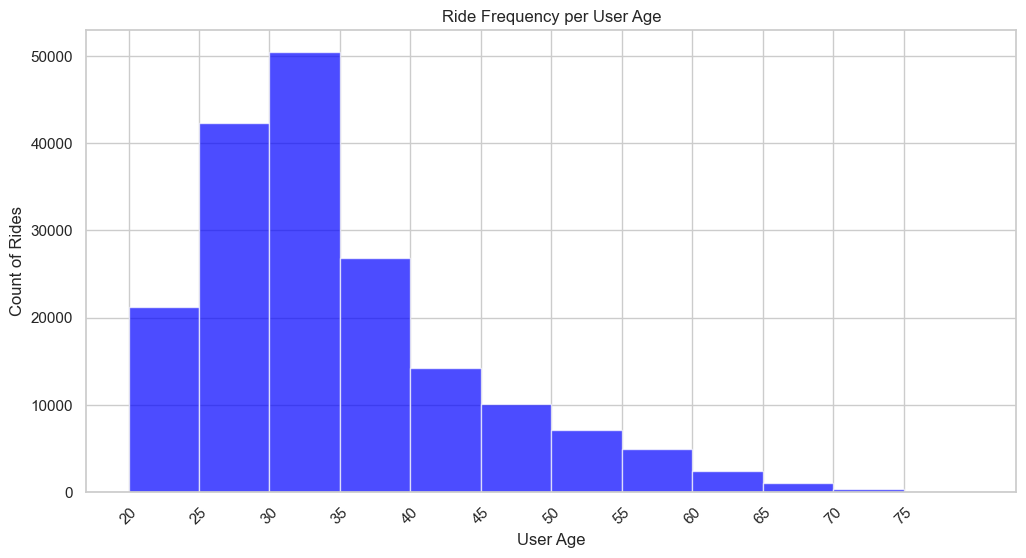

In [194]:
# Calculate user age based on birth year
year_of_data = 2019
dataset['user_age'] = year_of_data - dataset['member_birth_year']

bins = np.arange(20, 81, 5)

# Create histogram to visualize ride frequency per user age
plt.figure(figsize=(12, 6))
plt.hist(data=dataset, x='user_age', color='blue', bins=bins, alpha=0.7)
plt.title('Ride Frequency per User Age')
plt.xlabel('User Age')
plt.ylabel('Count of Rides')
plt.xticks(np.arange(20,80,5), rotation=45)
plt.show()

> The histogram for ride frequency per user age demonstrates a skewed distribution, with the highest ride frequency among users in their late 20s to early 30s. Older age groups exhibit decreasing ride frequency, while younger users show relatively lower participation, indicating a peak in bike-sharing usage among individuals in their late 20s and early 30s.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of ride durations in the dataset is right-skewed, with most trips being relatively short, around 500 seconds (approximately 8 minutes). However, there is a long tail of longer trip durations, indicating the presence of outliers with very long rides. Transformations were performed to visualize it in various ways. Initially, a histogram was used to observe the frequency of trip durations within different bins. Later, the distribution was visualized on a log scale for the entire range of trip durations to emphasize the presence of outliers with very long durations. The distribution of user age shows a peak in ride frequency among individuals in their late 20s to early 30s, while older and younger age groups exhibit lower participation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During the investigation of features in the dataset, several unusual distributions were observed. Notably, the ride duration distribution exhibited a right-skewed pattern, with most trips being short in duration but a long tail of outliers featuring very long rides. The distribution of user ages showed a peak in ride frequency among those in their late 20s to early 30s, with less participation from older and younger age groups. To enhance data analysis, operations were performed to convert time-related columns into datetime objects and calculate user ages. These adjustments facilitated a deeper understanding of ride patterns and user demographics within the dataset.

## Bivariate Exploration

> In this section, I'm going to investigate relationships between pairs of variables in my data.

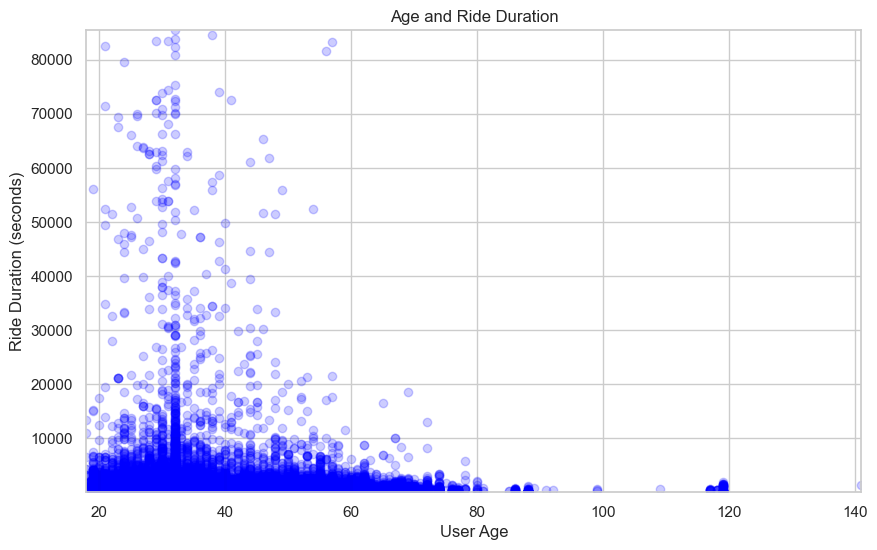

In [197]:
# Create a scatter plot to investigate the relationship between Age and Duration of rides
plt.figure(figsize=(10, 6))
plt.scatter(data=dataset, x='user_age', y='duration_sec', alpha=0.2, color='blue')
plt.title('Age and Ride Duration')
plt.xlabel('User Age')
plt.ylabel('Ride Duration (seconds)')
plt.xlim(dataset['user_age'].min(), dataset['user_age'].max())
plt.ylim(dataset['duration_sec'].min(), dataset['duration_sec'].max())
plt.show()

> The above scatter plot demonstrates a negative correlation between user age and ride duration, with older users exhibiting shorter ride durations compared to younger users. This finding is consistent with the previous observation that older age groups exhibit lower ride frequency compared to younger users. The scatter plot reveals a relatively weak and scattered relationship between user age and ride duration. While there is no clear linear trend, it suggests that ride durations vary widely across different age groups, with no evident correlation between age and the length of bike rides.

<Figure size 1200x800 with 0 Axes>

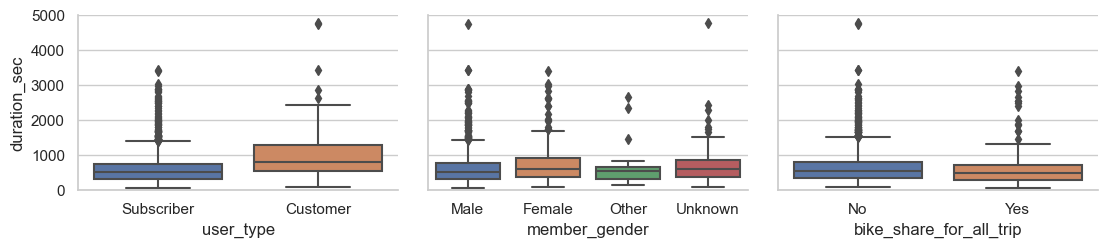

In [201]:
# Sample a subset of the dataset for better visualization
samples = np.random.choice(dataset.shape[0], 2000, replace=False)
dataset_sample = dataset.loc[samples, :]

# Create a boxplot grid to investigate relationships
plt.figure(figsize=[12, 8])
g = sns.PairGrid(data=dataset_sample, y_vars=['duration_sec'], x_vars=['user_type', 'member_gender', 'bike_share_for_all_trip'], aspect=1.5)
g.map(sns.boxplot, palette='viridis')
g.set(ylim=(0, 5000))  # Set the y-axis limits for better visualization
plt.show()

> The boxplots reveal interesting insights into the relationships between categorical variables and ride duration. Customers tend to have longer ride durations than Subscribers, and females have slightly higher average ride durations than males. The "Bike Share for All Trip" program does not appear to have a significant impact on ride duration, as the average ride duration is slightly higher for users who did not opt for the program. The boxplots also highlight the presence of outliers in the dataset, with very long ride durations.

<Figure size 1000x1000 with 0 Axes>

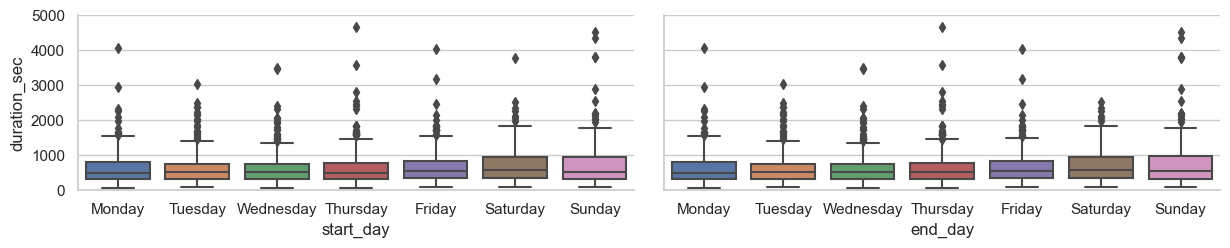

In [220]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sample a subset of the dataset for better visualization
samples = np.random.choice(dataset.shape[0], 2000, replace=False)
dataset_sample = dataset.loc[samples, :]

# Create a boxplot grid to investigate relationships
# Create a PairGrid for 'start_day' and 'end_day' against ride duration
plt.figure(figsize=[10, 10])
g = sns.PairGrid(data=dataset_sample, y_vars=['duration_sec'], x_vars=['start_day', 'end_day'], aspect=2.5)
g.map(sns.boxplot, palette='viridis', order=day_order)
plt.ylim([0, 5000])
plt.show()

> The boxplots indicate a positive relationship between trip duration and the days of the week, with average trip durations increasing gradually from Monday through Sunday. Furthermore, ride durations exhibit variations across different days of the week, with some weekdays showing slightly longer rides. Notably, weekends tend to have a wider range of ride durations compared to weekdays.

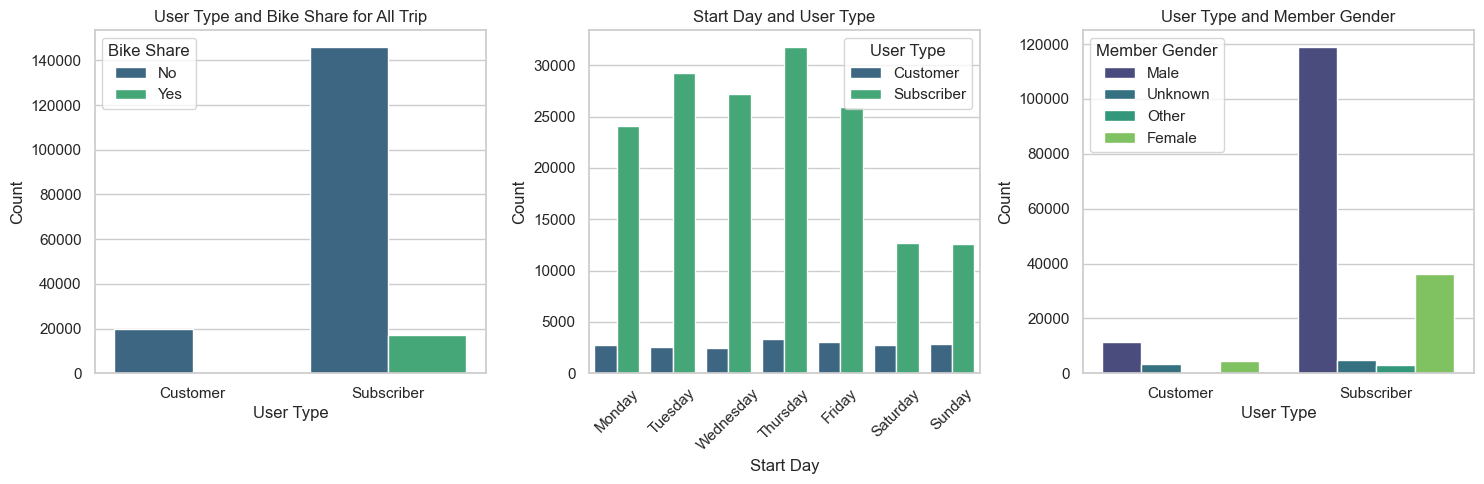

In [224]:
# Create a clustered bar chart with 3 subplots
plt.figure(figsize=(15, 5))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Subplot 1: 'user_type' and 'bike_share_for_all_trip'
plt.subplot(1, 3, 1)
sns.countplot(data=dataset, x='user_type', hue='bike_share_for_all_trip', palette='viridis')
plt.title('User Type and Bike Share for All Trip')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Bike Share')

# Subplot 2: 'start_day' and 'user_type'
plt.subplot(1, 3, 2)
sns.countplot(data=dataset, x='start_day', hue='user_type', palette='viridis', order=day_order)
plt.title('Start Day and User Type')
plt.xlabel('Start Day')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='User Type')

# Subplot 3: 'user_type' and 'member_gender'
plt.subplot(1, 3, 3)
sns.countplot(data=dataset, x='user_type', hue='member_gender', palette='viridis')
plt.title('User Type and Member Gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Member Gender')

plt.tight_layout()
plt.show()

> It can be deduced that bike sharing is only available to subscribers which is intuitive. User types exhibit varying distributions across different days of the week. Weekends attract more customers, while weekdays have a higher concentration of subscribers, suggesting potential commuting patterns. Males are the major subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Throughout this exploration, we uncovered intriguing relationships within the dataset. One notable finding revealed an inverse correlation between user age and trip duration, with younger individuals taking longer rides. Additionally, subscribers were found to have longer trip durations compared to customers, possibly indicating distinct usage patterns or commuting behaviors. Gender differences were also evident, as males tended to have shorter trips than females. Furthermore, bike-sharing behavior was associated with trip duration, with users who share bikes for the entire journey opting for shorter rides. Lastly, the interplay between user type and bike share participation underscored how subscribers were less inclined to use the bike share program, while weekends attracted more customer rides, suggesting potential commute-related trends. These insights provide valuable context for understanding bike-sharing patterns and user behavior in the dataset.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most users who share bikes are in the twenties of age. Bike sharing occurs only by subscribers which is intuitive.

## Multivariate Exploration

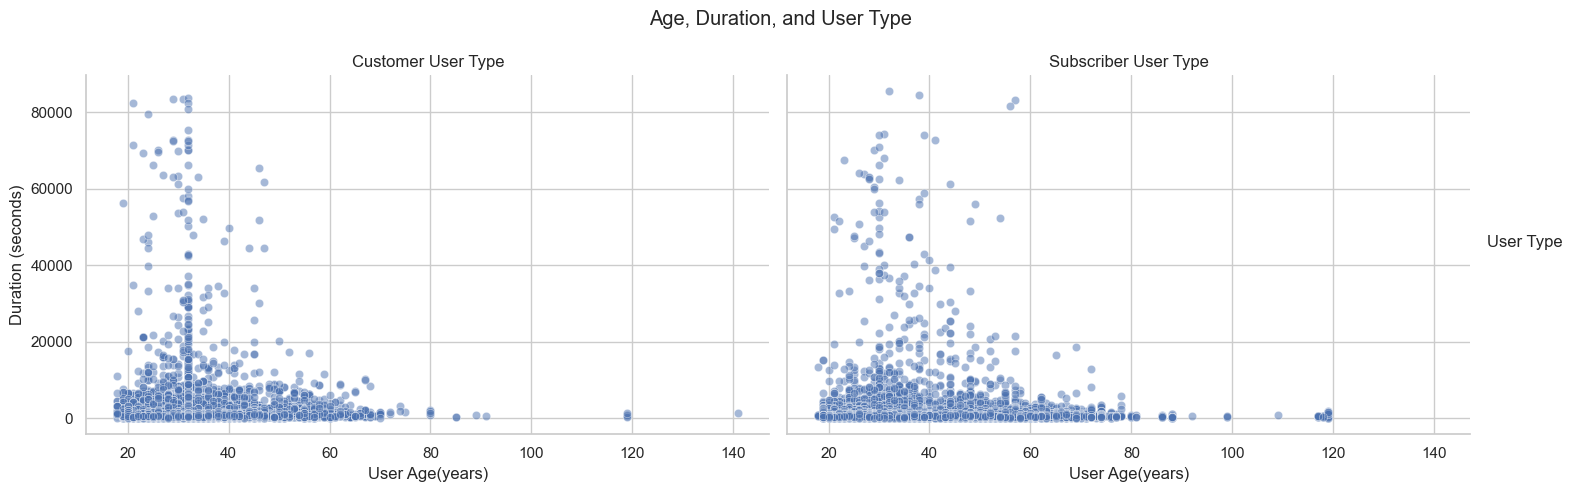

In [241]:
# Create a facet grid for Age, Duration, and User Type
g = sns.FacetGrid(data=dataset, col='user_type', height=5, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='user_age', y='duration_sec', alpha=0.5)
g.set_axis_labels('User Age(years)', 'Duration (seconds)')
g.set_titles(col_template="{col_name} User Type")
g.add_legend(title='User Type')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age, Duration, and User Type')
plt.show()

> This visualization effectively underscores the distinctions in ride duration and user age between Subscribers and Customers.

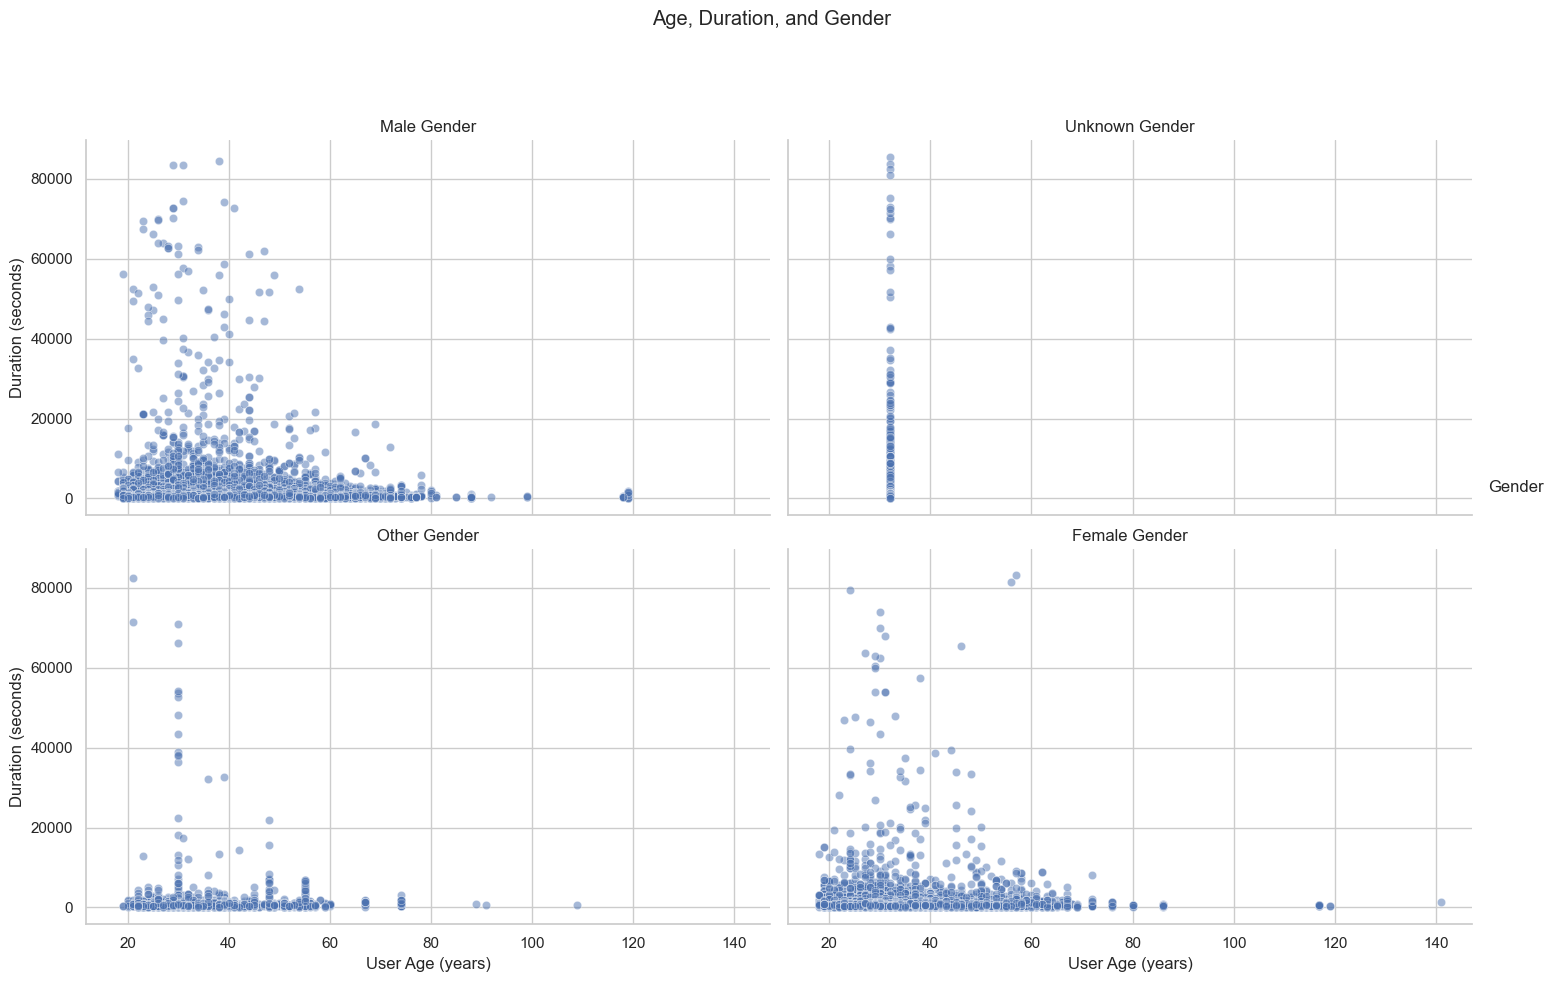

In [243]:
# Create a facet grid for Age, Duration, and Gender with two rows
g = sns.FacetGrid(data=dataset, col='member_gender', height=5, aspect=1.5, col_wrap=2)
g.map_dataframe(sns.scatterplot, x='user_age', y='duration_sec', alpha=0.5)
g.set_axis_labels('User Age (years)', 'Duration (seconds)')
g.set_titles(col_template="{col_name} Gender")
g.add_legend(title='Gender')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age, Duration, and Gender')
plt.show()

> I observed that shorter ride durations are prevalent, regardless of gender, among riders of various ages. The Gender has no effect on the relationship between the Age and the Duration.

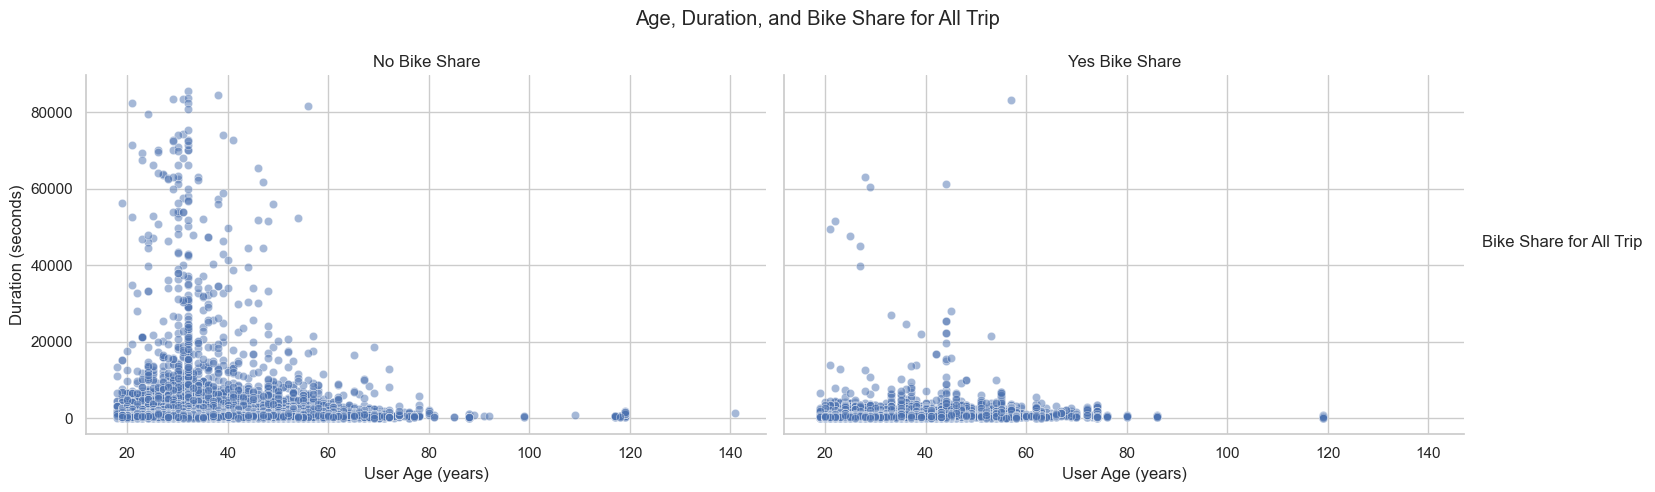

In [244]:
# Create a facet grid for Age, Duration, and Bike Share for All Trip
g = sns.FacetGrid(data=dataset, col='bike_share_for_all_trip', height=5, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='user_age', y='duration_sec', alpha=0.5)
g.set_axis_labels('User Age (years)', 'Duration (seconds)')
g.set_titles(col_template="{col_name} Bike Share")
g.add_legend(title='Bike Share for All Trip')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age, Duration, and Bike Share for All Trip')
plt.show()

From the above plots, I observe that users who don't share bikes for all trips take slightly longer rides and users who share bikes for all trips tend to have shorter average ride durations regardless of age.

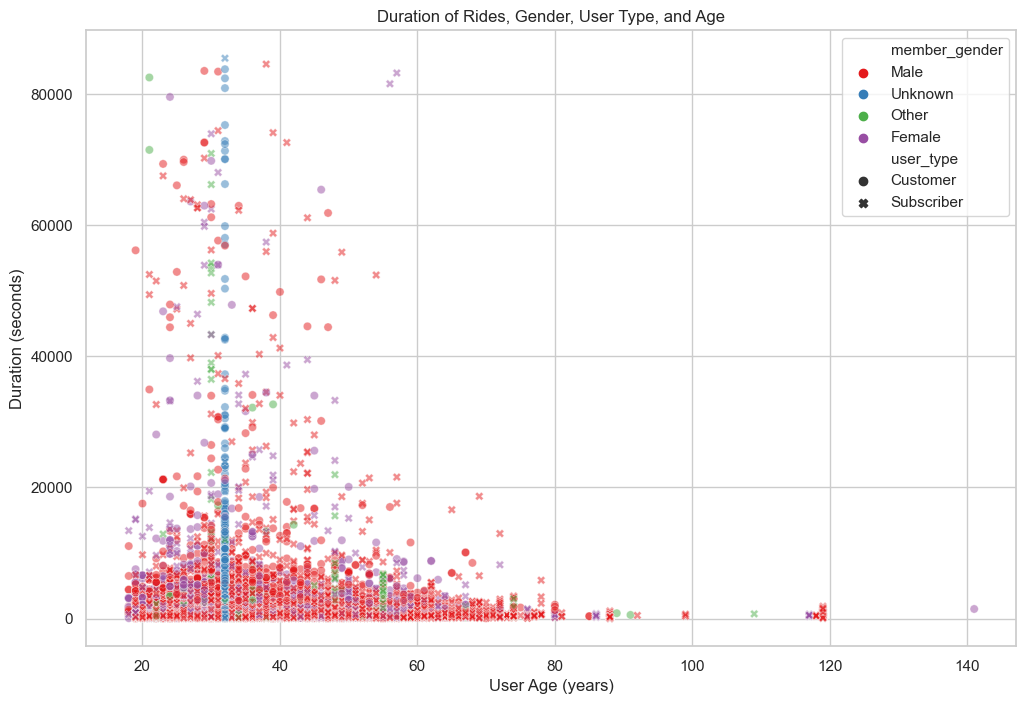

In [251]:
# Create scatterplot of duration vs. age with additional encodings for gender and user type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataset, x='user_age', y='duration_sec', hue='member_gender', palette='Set1', alpha=0.5, style='user_type')
plt.title('Duration of Rides, Gender, User Type, and Age')
plt.xlabel('User Age (years)')
plt.ylabel('Duration (seconds)')
plt.legend()
plt.show()

> I observed that there's a wide range of ride durations for users of different ages, genders, and types. Most prominently, subscribers, regardless of their age or gender, tend to have shorter ride durations, while customers show more variability, with some taking significantly longer rides. Additionally, the plot reveals that there are more male subscribers among younger users taking shorter rides compared to female subscribers.

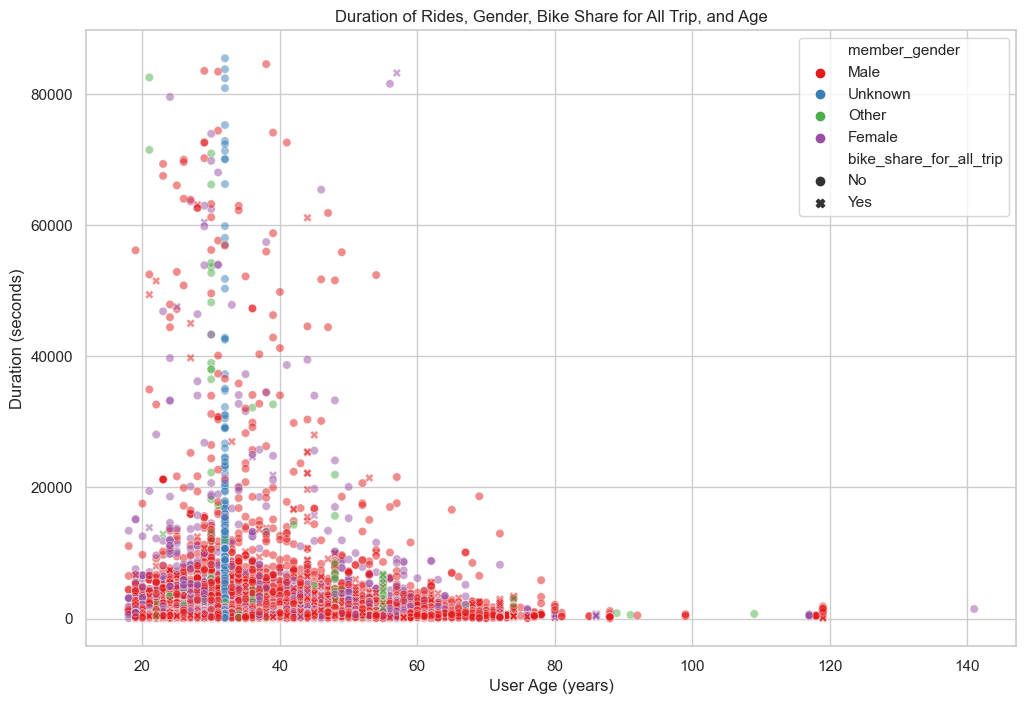

In [252]:
# Create scatterplot of duration and age with additional encodings for gender and bike sharing
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataset, x='user_age', y='duration_sec', hue='member_gender', palette='Set1', alpha=0.5, style='bike_share_for_all_trip')
plt.title('Duration of Rides, Gender, Bike Share for All Trip, and Age')
plt.xlabel('User Age (years)')
plt.ylabel('Duration (seconds)')
plt.legend()
plt.show()

> The majority of data points are concentrated in the lower-left portion of the plot, signifying shorter ride durations and younger user ages. These characteristics seem to be consistent across genders and bike sharing status. However, within this cluster, there is a discernible pattern: longer-duration rides are more frequently associated with male users. Interestingly, bike sharing status, whether for all trips or not, does not appear to exert a substantial influence on ride duration, as both categories are interspersed throughout the plot. This underscores the significance of user age and gender in shaping ride duration patterns, also highlights the relative insignificance of bike sharing status in this context.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This analysis brought forth several critical insights. Firstly, ride duration strongly correlated with user type, highlighting that subscribers favoured shorter trips, possibly for commuting, while customers engaged in a wider range of ride durations, indicative of diverse usage purposes. Secondly, while most rides exhibited shorter durations, males stood out with a propensity for longer trips, though this gender-based distinction was not overly pronounced. Lastly, bike sharing status played a substantial role, with bike-sharing users consistently opting for shorter journeys, contrasting with non-bike-sharing users who often embarked on lengthier rides. User type and bike sharing status strengthened each other in shaping ride behaviours. 

### Were there any interesting or surprising interactions between features?

> Intriguing interactions between features emerged. Notably, user type strongly correlated with ride duration, where subscribers tended to opt for shorter rides, likely for daily commuting, while customers displayed more diverse ride durations. Gender, on the other hand, exhibited a limited impact on ride duration, despite slight variations in longer rides among males. This unexpected result suggested that factors beyond gender played a more significant role. Furthermore, the bike sharing status had a clear influence, with bike-sharing users favouring shorter trips and non-bike-sharing users engaging in longer rides

## Conclusions

In the comprehensive data exploration of bike-sharing patterns for February and March 2019, several key findings and insights emerged:

1. Temporal Trends: The analysis revealed that most bike trips occurred on Thursdays and Tuesdays, while weekends had the fewest trip records. Additionally, the data showed clear peaks during typical rush hours (8-9 am and 5-6 pm), suggesting that users often utilize bikes for their daily commutes.
2. User Characteristics: The majority of bike-sharing users were subscribers (90%), and less than 10% of trips were part of the Bike Share for All program. Furthermore, over 70% of users were male. These demographic trends shed light on the user base and its preferences.

3. User Type Influence: User type played a significant role in shaping ride behavior. Subscribers tended to take shorter rides, possibly for commuting, while customers exhibited more varied usage patterns with a broader range of ride durations.

4. Gender Impact: Gender had a limited influence on ride duration, with most users, regardless of gender, taking shorter trips. Although there were some longer rides more prevalent among males, the overall correlation between gender and ride duration was not strong.

5. Age and Duration: While age did not show a strong linear correlation with ride duration, there was a cluster of shorter rides among younger users.

The exploration process followed a structured approach, starting with univariate analysis and progressing to bivariate and multivariate exploration. Visualizations played a crucial role in uncovering patterns and trends in the data, facilitating insights into user behavior.